In [1]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
from sklearn.metrics import jaccard_score, adjusted_mutual_info_score

In [5]:
run_names = [f"ClusterAssignMatrix1_Time{time}_Fold{fold}.csv" for time in np.arange(1,4) for fold in np.arange(1,6)]
run_names

['ClusterAssignMatrix1_Time1_Fold1.csv',
 'ClusterAssignMatrix1_Time1_Fold2.csv',
 'ClusterAssignMatrix1_Time1_Fold3.csv',
 'ClusterAssignMatrix1_Time1_Fold4.csv',
 'ClusterAssignMatrix1_Time1_Fold5.csv',
 'ClusterAssignMatrix1_Time2_Fold1.csv',
 'ClusterAssignMatrix1_Time2_Fold2.csv',
 'ClusterAssignMatrix1_Time2_Fold3.csv',
 'ClusterAssignMatrix1_Time2_Fold4.csv',
 'ClusterAssignMatrix1_Time2_Fold5.csv',
 'ClusterAssignMatrix1_Time3_Fold1.csv',
 'ClusterAssignMatrix1_Time3_Fold2.csv',
 'ClusterAssignMatrix1_Time3_Fold3.csv',
 'ClusterAssignMatrix1_Time3_Fold4.csv',
 'ClusterAssignMatrix1_Time3_Fold5.csv']

In [61]:
def get_result(fpath, ids_all):
    file_list = [os.path.join(src_dir, id_current, fpath) for id_current in ids_all]
    arrays = [pd.read_csv(file, header=None).to_numpy() for file in file_list]
    combined_array = np.concatenate(arrays, axis=0)
    result = (np.argmax(combined_array, axis=1) == 0).astype(int)
    return result

In [3]:
def get_result_max(fpath, ids_all):
    file_list = [os.path.join(src_dir, id_current, fpath) for id_current in ids_all]
    arrays = [pd.read_csv(file, header=None).to_numpy() for file in file_list]
    combined_array = np.concatenate(arrays, axis=0)
    result = np.argmax(combined_array, axis=1)
    return result

In [6]:
src_dir = "/home/owkin/project/cytocommunity_results/unsupervised/2024-10-31_14-44-14/ensemble/ImageCollection"
ids_all = os.listdir(src_dir)


In [63]:
jaccards = np.zeros((15,15))

for i in range(15):
    for j in tqdm(range(15)):
        result1 = get_result(run_names[i], ids_all)
        result2 = get_result(run_names[j], ids_all)
        jaccards[i,j] = jaccard_score(result1, result2)

 87%|████████▋ | 13/15 [00:15<00:02,  1.17s/it]/home/owkin/.local/conda/envs/CytoCommunity/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 15/15 [00:17<00:00,  1.15s/it]


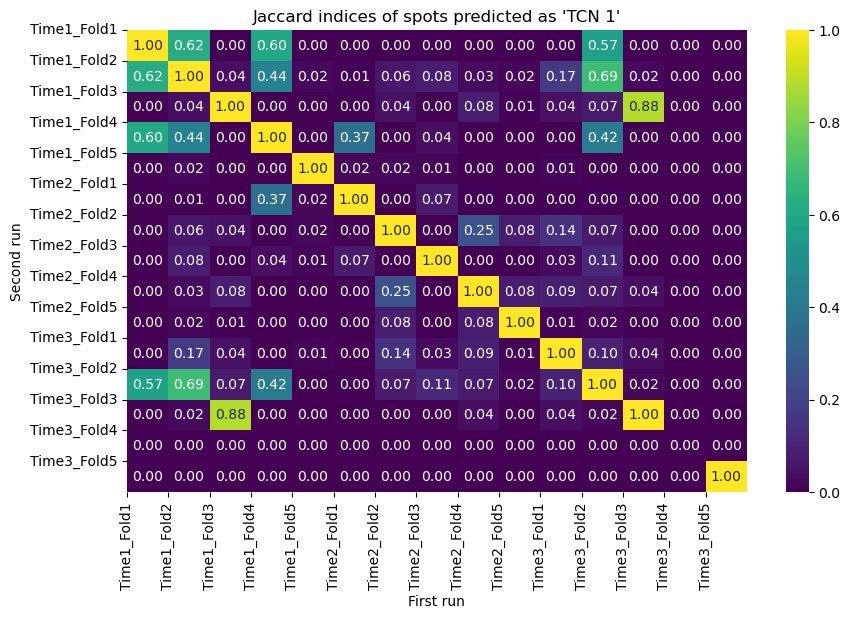

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create a heatmap
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.heatmap(jaccards, annot=True, fmt=".2f", cmap='viridis')  # You can change 'viridis' to other colormaps

# Add titles and labels
plt.title("Jaccard indices of spots predicted as 'TCN 1'")
plt.xlabel('First run')
plt.ylabel('Second run')

names = [f"Time{time}_Fold{fold}" for time in np.arange(1,4) for fold in np.arange(1,6)]
plt.xticks(range(15), names, rotation=90)
plt.yticks(range(15), names, rotation=0)

# Show the plot
plt.show()


# Adjusted mutual information

In [9]:
ami = np.zeros((15,15))

for i in range(15):
    for j in tqdm(range(15)):
        result1 = get_result_max(run_names[i], ids_all)
        result2 = get_result_max(run_names[j], ids_all)
        ami[i,j] = adjusted_mutual_info_score(result1, result2)

100%|██████████| 15/15 [00:20<00:00,  1.36s/it]


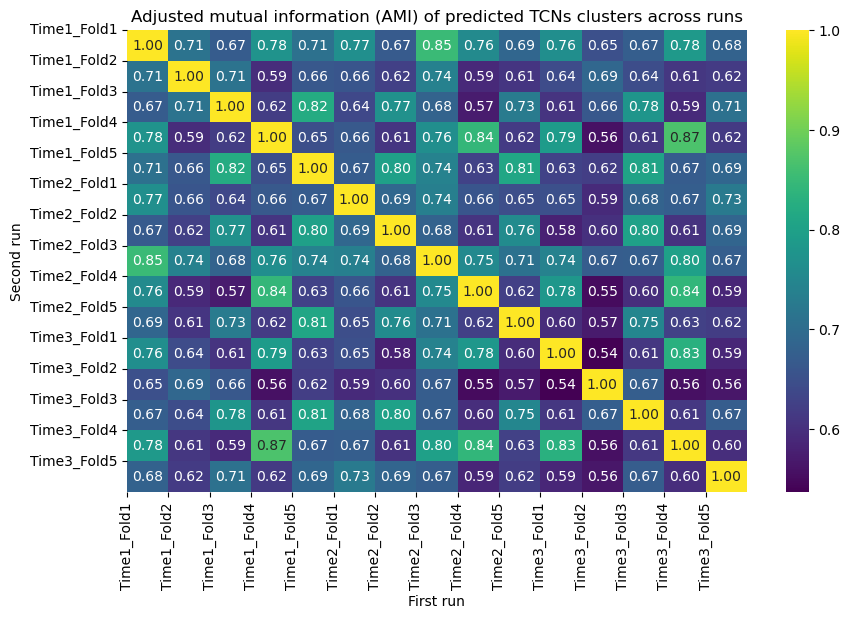

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create a heatmap
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.heatmap(ami, annot=True, fmt=".2f", cmap='viridis')  # You can change 'viridis' to other colormaps

# Add titles and labels
plt.title("Adjusted mutual information (AMI) of predicted TCNs clusters across runs")
plt.xlabel('First run')
plt.ylabel('Second run')

names = [f"Time{time}_Fold{fold}" for time in np.arange(1,4) for fold in np.arange(1,6)]
plt.xticks(range(15), names, rotation=90)
plt.yticks(range(15), names, rotation=0)

# Show the plot
plt.show()


(369112, 5)